In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##plt.style.use('dark_background')

In [29]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Preprocessing

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [31]:
# Dropping missing values

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
data.duplicated().sum()

0

In [33]:
# Cheching the DataSet Distribution
data['Exited'].value_counts()/len(data)
#imbalanced Data

,count
Exited,
0,0.7963
1,0.2037


## Data Visualization

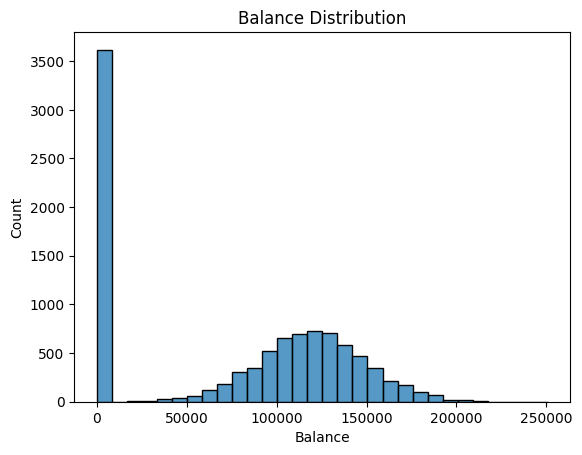

In [36]:
sns.histplot(data['Balance'], bins=30)
plt.title('Balance Distribution')
plt.show()

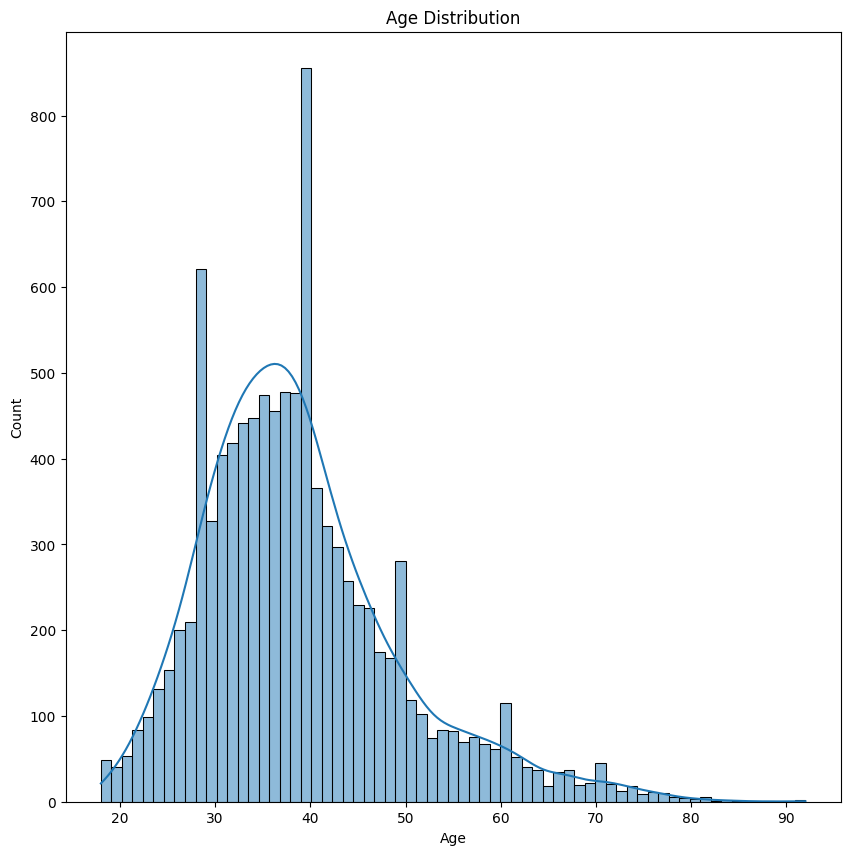

In [34]:
plt.figure(figsize=(10,10))
sns.histplot(data=data,x='Age',kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

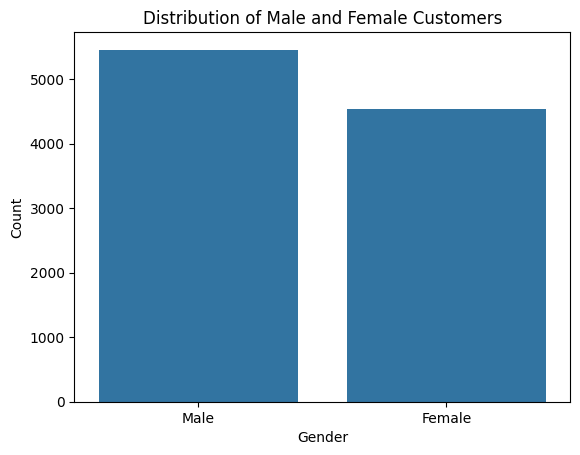

In [35]:
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Male and Female Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [37]:
# 1. Age Grouping
def age_group(age):
    if age < 25:
        return 'Young'
    elif 25 <= age < 50:
        return 'Middle-Aged'
    else:
        return 'Senior'

data['AgeGroup'] = data['Age'].apply(age_group)

In [38]:
# 2. Balance Segmentation
def balance_category(balance):
    if balance < 1000:
        return 'Low'
    elif 1000 <= balance < 5000:
        return 'Medium'
    else:
        return 'High'

data['BalanceCategory'] = data['Balance'].apply(balance_category)

In [39]:
# 3. Tenure Encoding
def tenure_category(tenure):
    if tenure < 3:
        return 'Short-term'
    elif 3 <= tenure < 6:
        return 'Medium-term'
    else:
        return 'Long-term'

data['TenureCategory'] = data['Tenure'].apply(tenure_category)

In [40]:
# 4. Customer Activity Score
data['ActivityScore'] = data['NumOfProducts'] + data['HasCrCard'] + data['IsActiveMember']

In [41]:
# 5. Ratio Feature
data['BalanceToSalary'] = data['Balance'] / (data['EstimatedSalary'] + 1e-6)  # Added small value to avoid division by zero

In [42]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,BalanceCategory,TenureCategory,ActivityScore,BalanceToSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-Aged,Low,Short-term,3,0.000000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-Aged,High,Short-term,2,0.744677
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-Aged,High,Long-term,4,1.401375
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Middle-Aged,Low,Short-term,2,0.000000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-Aged,High,Short-term,3,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Middle-Aged,Low,Medium-term,3,0.000000
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Middle-Aged,High,Long-term,3,0.564108
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Middle-Aged,Low,Long-term,2,0.000000
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Middle-Aged,High,Medium-term,3,0.808230


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()

# Drop original unnecessary features
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Age', 'Balance', 'Tenure'])

# Convert categorical features to numerical using Label Encoding
data['AgeGroup'] = label_encoder.fit_transform(data['AgeGroup'])
data['BalanceCategory'] = label_encoder.fit_transform(data['BalanceCategory'])
data['TenureCategory'] = label_encoder.fit_transform(data['TenureCategory'])
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [44]:
# Define new features and target variable
X = data.drop(columns=['Exited'])
y = data['Exited']

In [45]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Evaluation Matrics

In [48]:
#Confusion Metrics

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
cf

array([[1533,   74],
       [ 246,  147]])

In [49]:
# Accuracy
model.score(X_test,y_test)

0.84

In [50]:
# Calculating precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
precision

0.665158371040724

In [51]:
# Calculating Recall score
from sklearn.metrics import recall_score
Recall = recall_score(y_test,y_pred)
Recall

0.37404580152671757

In [52]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test,y_pred)
F1

0.4788273615635179

Text(45.722222222222214, 0.5, 'Truth')

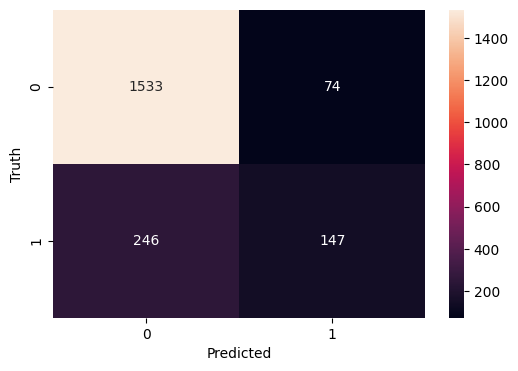

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
# Predicted Probability
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.8160838 , 0.18391618],
       [0.99647504, 0.00352496],
       [0.9337883 , 0.0662117 ],
       ...,
       [0.49246842, 0.5075316 ],
       [0.6991532 , 0.30084682],
       [0.6873038 , 0.31269622]], dtype=float32)

# Precision-Recall Curve

In [57]:
# gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, y_pred_prob[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((1999,), (1999,), (1998,))

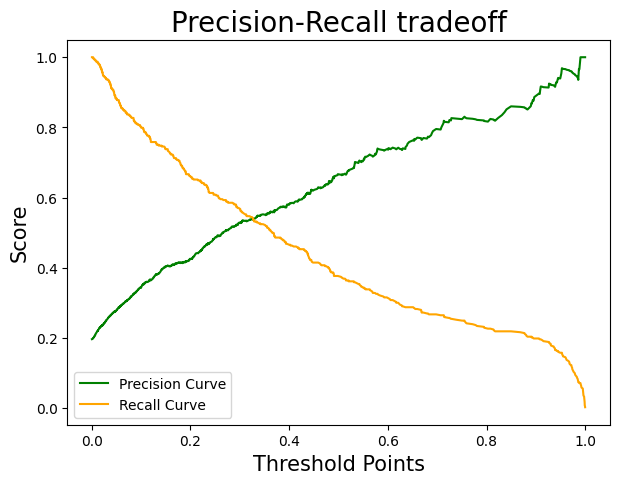

In [58]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

# AUC/ROC Curve

In [59]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])

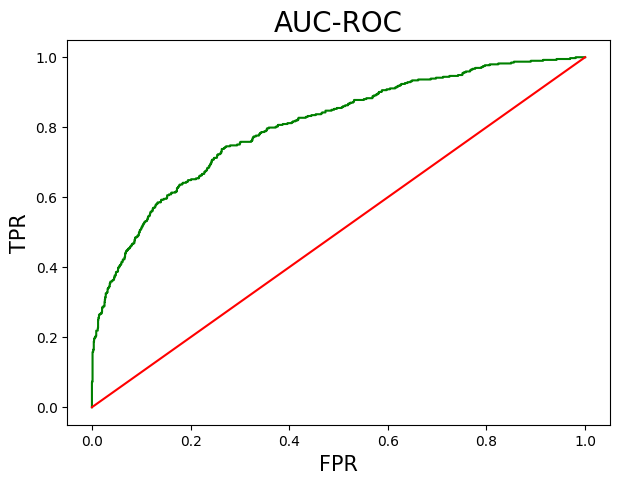

0.8032375849297998

In [60]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, y_pred_prob[:,1])